In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot, Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv2D, LSTM
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

# Read the text file
with open('train.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Initialize lists to store data
languages = []
words = []

# Process each line and split into components
for line in lines:
    line = line.strip()
    if line:
        parts = line.split('\t')
        if len(parts) == 2:
            word, lang = parts
            languages.append(lang.strip())
            words.append(word.strip())

# Create a DataFrame
data = {'Word': words, 'Language': languages}
df = pd.DataFrame(data)

# Save as CSV
df.to_csv('data15.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


In [3]:
lang_label = pd.read_csv("data15.csv")
lang_label.shape
lang_label.head()

,Word,Language
0,@,O
1,AdilNisarButt,Hin
2,pakistan,Hin
3,ka,Hin
4,ghra,Hin


In [4]:
lang_label.isnull().any()

Word         True
Language    False
dtype: bool

In [5]:
lang_label["Word"].dropna()

0                     @
1         AdilNisarButt
2              pakistan
3                    ka
4                  ghra
              ...      
395980             kuch
395981              bhi
395982             nahi
395983          karenge
395984                .
Name: Word, Length: 395974, dtype: object

In [6]:
lang_label = lang_label[~lang_label.apply(lambda row: row.astype(str).str.contains('O').any(), axis=1)]

In [7]:
lang_label.dropna()

,Word,Language
1,AdilNisarButt,Hin
2,pakistan,Hin
3,ka,Hin
4,ghra,Hin
5,tauq,Hin
...,...,...
395979,alawa,Hin
395980,kuch,Hin
395981,bhi,Hin
395982,nahi,Hin


In [8]:
lang_label.isnull().any()

Word         True
Language    False
dtype: bool

In [9]:
lang_label.head(15)

,Word,Language
1,AdilNisarButt,Hin
2,pakistan,Hin
3,ka,Hin
4,ghra,Hin
5,tauq,Hin
6,he,Eng
7,Pakistan,Eng
8,Israel,Eng
9,ko,Eng
10,tasleem,Hin


In [10]:
lang_label["Word"][2]

'pakistan'

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ameen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))


TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', str(text))


class CustomPreprocess():
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    def __init__(self):
        pass

    def preprocess_text(self,sen):
        if sen == 'str':
          sen = sen.lower()
        else:
          pass

        # Remove html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)

        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

        # Remove multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

        # Remove Stopwords
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', str(sentence))

        return sentence

In [13]:
lang_label.to_csv('filtered_data2.csv', index=False)  # Replace 'filtered_data.csv' with your desired output file path


In [14]:
lang_label_Upd = pd.read_csv("filtered_data2.csv")
lang_label_Upd.shape
lang_label_Upd.head()

,Word,Language
0,AdilNisarButt,Hin
1,pakistan,Hin
2,ka,Hin
3,ghra,Hin
4,tauq,Hin


In [15]:
custom = CustomPreprocess()
custom.preprocess_text("Those were the best days of my life!")

'Those best days life '

In [16]:
# Calling preprocessing_text function on movie_reviews
X = []
sentences = list(lang_label_Upd['Word'])
for sen in sentences:
    X.append(custom.preprocess_text(sen))

In [17]:
# Sample cleaned up movie review

X[2]
X

['AdilNisarButt',
 'pakistan',
 'ka',
 'ghra',
 'tauq',
 '',
 'Pakistan',
 'Israel',
 'ko',
 'tasleem',
 'nahein',
 'kerta',
 'Isko',
 'Palestine',
 'kehta',
 '',
 'PALESTINE',
 'Madarchod',
 'mulle',
 'ye',
 'mathura',
 '',
 'Nahi',
 'dikha',
 'tha',
 'jab',
 'mullo',
 'ne',
 'Hindu',
 'ko',
 'iss',
 'liye',
 'mara',
 'ki',
 'vo',
 'lasse',
 'ki',
 'paise',
 'mag',
 'liye',
 '',
 'https',
 '',
 'co',
 'oxf tr bly',
 'narendramodi',
 'Manya',
 'Pradhan',
 'Mantri',
 'mahoday',
 'Shriman',
 'Narendra',
 'Modi',
 'ji',
 'Pradhanmantri',
 'banne',
 'par',
 'Hardik',
 'Badhai',
 'tahe',
 'Dil',
 'https',
 '',
 'co',
 'pRnoMsKkn ',
 'Atheist',
 'Krishna',
 'Jcb',
 'full',
 'trend',
 '',
 'chal',
 'rahi',
 'aa',
 'AbhisharSharma',
 'RavishKumarBlog',
 'Loksabha',
 '',
 'janta',
 'sirf',
 'modi',
 'ko',
 'vote',
 'de',
 'rahi',
 'thi',
 'na',
 'ki',
 'kisi',
 'MP',
 '',
 'BJP',
 'ko',
 'without',
 '',
 'https',
 '',
 'co',
 'sHtBWCB FM',
 'noirnaveed',
 'AngelAhana ',
 'cricketworldcup',
 'Bh

In [31]:
# Converting sentiment labels to 0 & 1

y = lang_label_Upd['Language']

y = np.array(list(map(lambda x: 1 if x=="Eng" else 0, y)))

In [32]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models
# while test set will be used to evaluate how well our model performs

Preparing Embedding Layer
Let's now write the script for our embedding layer. Embedding layer converts our textual data into numeric form. It is then used as the first layer for the deep learning models in Keras.

In [34]:
# # Embedding layer expects the words to be in numeric form
# # Using Tokenizer function from keras.preprocessing.text library
# # Method fit_on_text trains the tokenizer
# # Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

# word_index = word_tokenizer.word_index

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [35]:
X_train

[[],
 [13656],
 [2],
 [13657],
 [13658],
 [105],
 [],
 [446],
 [4275],
 [6],
 [4276],
 [],
 [426],
 [13659],
 [13660],
 [6504],
 [3],
 [7],
 [749],
 [796],
 [],
 [],
 [121],
 [168],
 [13661],
 [],
 [340],
 [13662],
 [94],
 [13663],
 [4277],
 [5156],
 [8627],
 [3612],
 [477],
 [13664],
 [102],
 [636],
 [105],
 [165],
 [44],
 [240],
 [],
 [8628],
 [7],
 [],
 [2],
 [13665],
 [921],
 [1109],
 [29],
 [666],
 [],
 [],
 [2],
 [],
 [6505],
 [9],
 [187],
 [2480],
 [1390],
 [55],
 [296],
 [122],
 [282],
 [60],
 [256],
 [372],
 [4],
 [],
 [35],
 [6506],
 [6507],
 [90],
 [],
 [110],
 [6508],
 [62],
 [251],
 [819],
 [281],
 [127],
 [8629],
 [],
 [],
 [],
 [2247],
 [14],
 [1],
 [388],
 [80],
 [2779],
 [1391],
 [2055],
 [2481],
 [],
 [],
 [3],
 [],
 [582],
 [241],
 [418],
 [47],
 [644],
 [13666],
 [8630],
 [91, 13667],
 [5157],
 [59],
 [9],
 [112],
 [9],
 [62],
 [13668],
 [109],
 [1],
 [2482],
 [68, 3147, 13669],
 [],
 [13670],
 [],
 [1034],
 [287],
 [12],
 [6509],
 [2056],
 [],
 [323],
 [1200],
 [11

In [36]:
import io
import json
# Saving
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer3.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [37]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

# Padding all reviews to fixed length 100
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [38]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(41994, 100)

## Model Training

In [39]:
### Simple Neural Network

# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          4199400   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 4,209,401
Trainable params: 10,001
Non-trainable params: 4,199,400
_________________________________________________________________
None


In [40]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
1559/1559 [==============================] - 11s 7ms/step - loss: 0.5374 - acc: 0.7050 - val_loss: 0.5258 - val_acc: 0.7084
Epoch 2/6
1559/1559 [==============================] - 12s 8ms/step - loss: 0.5266 - acc: 0.7073 - val_loss: 0.5250 - val_acc: 0.7079
Epoch 3/6
1559/1559 [==============================] - 11s 7ms/step - loss: 0.5261 - acc: 0.7075 - val_loss: 0.5249 - val_acc: 0.7072
Epoch 4/6
1559/1559 [==============================] - 11s 7ms/step - loss: 0.5259 - acc: 0.7078 - val_loss: 0.5251 - val_acc: 0.7081
Epoch 5/6
1559/1559 [==============================] - 11s 7ms/step - loss: 0.5259 - acc: 0.7077 - val_loss: 0.5250 - val_acc: 0.7078
Epoch 6/6
1559/1559 [==============================] - 12s 7ms/step - loss: 0.5258 - acc: 0.7078 - val_loss: 0.5251 - val_acc: 0.7079


In [41]:
# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)


1949/1949 [==============================] - 7s 4ms/step - loss: 0.5336 - acc: 0.6937


In [42]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5336225032806396
Test Accuracy: 0.6936818361282349


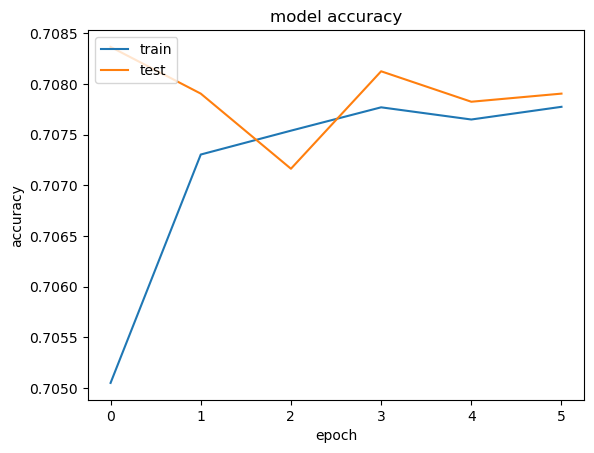

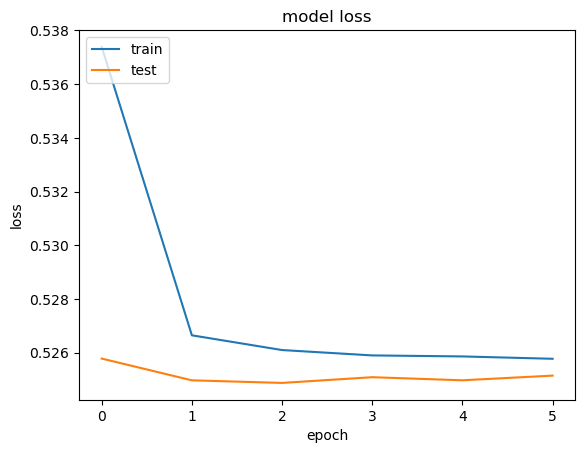

In [43]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [44]:
# CNN

from keras.layers import Conv1D
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          4199400   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,263,657
Trainable params: 64,257
Non-trainable params: 4,199,400
_________________________________________________________________
None


In [45]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
1559/1559 [==============================] - 127s 80ms/step - loss: 0.5051 - acc: 0.7205 - val_loss: 0.4951 - val_acc: 0.7263
Epoch 2/6
1559/1559 [==============================] - 126s 81ms/step - loss: 0.4886 - acc: 0.7289 - val_loss: 0.4897 - val_acc: 0.7295
Epoch 3/6
1559/1559 [==============================] - 122s 79ms/step - loss: 0.4832 - acc: 0.7313 - val_loss: 0.4861 - val_acc: 0.7290
Epoch 4/6
1559/1559 [==============================] - 128s 82ms/step - loss: 0.4794 - acc: 0.7329 - val_loss: 0.4882 - val_acc: 0.7280
Epoch 5/6
1559/1559 [==============================] - 140s 90ms/step - loss: 0.4769 - acc: 0.7337 - val_loss: 0.4875 - val_acc: 0.7294
Epoch 6/6
1559/1559 [==============================] - 146s 94ms/step - loss: 0.4749 - acc: 0.7348 - val_loss: 0.4865 - val_acc: 0.7286


In [46]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

1949/1949 [==============================] - 23s 12ms/step - loss: 0.4927 - acc: 0.7160


In [47]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.49265187978744507
Test Accuracy: 0.7159878015518188


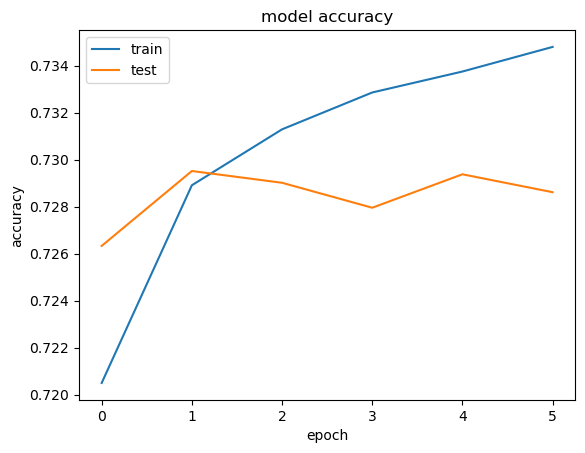

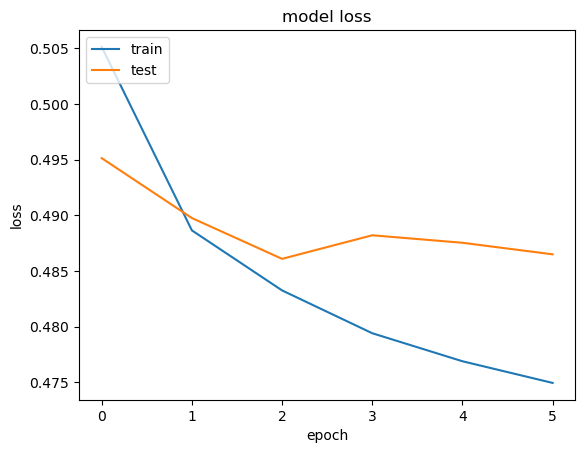

In [48]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [49]:
from keras.layers import LSTM
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          4199400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,316,777
Trainable params: 117,377
Non-trainable params: 4,199,400
_________________________________________________________________
None


In [ ]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
1559/1559 [==============================] - 580s 370ms/step - loss: 0.6784 - acc: 0.5865 - val_loss: 0.6780 - val_acc: 0.5891
Epoch 2/6
1559/1559 [==============================] - 4828s 3s/step - loss: 0.6782 - acc: 0.5865 - val_loss: 0.6772 - val_acc: 0.5891
Epoch 3/6
1559/1559 [==============================] - 409s 263ms/step - loss: 0.6782 - acc: 0.5865 - val_loss: 0.6773 - val_acc: 0.5891
Epoch 4/6
1559/1559 [==============================] - 2199s 1s/step - loss: 0.6782 - acc: 0.5865 - val_loss: 0.6772 - val_acc: 0.5891
Epoch 5/6
 393/1559 [======>.......................] - ETA: 4:46 - loss: 0.6785 - acc: 0.5855

In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Saving the model as a h5 file for possible use later

lstm_model.save(f"./c1_lstm_model_acc_{round(score[1], 3)}.h5", save_format='h5')

In [ ]:
# Load previously trained LSTM Model

from keras.models import load_model

model_path ='c1_lstm_model_acc_0.584.h5'
pretrained_lstm_model = load_model(model_path)

# summarize model.
pretrained_lstm_model.summary()

In [ ]:
# # Perform inference
# def predict_sentiment(text):
#     text_sequence = tokenizer.texts_to_sequences([text])
#     text_sequence = pad_sequences(text_sequence, maxlen=max_seq_length, padding='post')
#     predictions = pretrained_lstm_model.predict(text_sequence)
#     predicted_label_id = np.argmax(predictions, axis=1)[0]
#     if predicted_label_id == 0:
#         return "Positive"
#     else:
#         return "Negative"
    
# # Example sentiment prediction
# example_text = "This is a great product."
# predicted_sentiment = predict_sentiment(example_text)
# print(f"Sentiment: {predicted_sentiment}")

In [ ]:
# Preprocess review text with earlier defined preprocess_text function
unseen_reviews = "Hello this is very good movie"

unseen_processed = []
for review in unseen_reviews:
  review = custom.preprocess_text(review)
  unseen_processed.append(review)

In [ ]:
from keras_preprocessing.text import tokenizer_from_json
# Loading
with open('b3_tokenizer.json') as f:
    data = json.load(f)
    loaded_tokenizer = tokenizer_from_json(data)

In [ ]:
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = loaded_tokenizer.texts_to_sequences(unseen_processed)

In [ ]:
# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=100)

In [ ]:
# Passing tokenised instance to the LSTM model for predictions
unseen_sentiments = pretrained_lstm_model.predict(unseen_padded)
unseen_sentiments